In [41]:
from database.market import Market
import pandas as pd
from processor.processor import Processor as p
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
market = Market()

In [63]:
market.connect()
financials = market.retrieve("unified_financials")
sp5 = market.retrieve("sp500")
market.disconnect()

In [64]:
sp5

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [15]:
prices = []
for ticker in tqdm(financials["ticker"].unique()):
    prices.append(market.retrieve_ticker_prices("prices",ticker))
prices = pd.concat(prices)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [00:31<00:00, 15.95it/s]


In [17]:
prices = p.column_date_processing(prices)
prices["year"] = [x.year for x in prices["date"]]
prices["quarter"] = [x.quarter for x in prices["date"]]
quarterly_prices = prices.groupby(["year","quarter","ticker"]).mean().reset_index()

In [18]:
quarterly_prices

,year,quarter,ticker,close,high,low,open,volume,adjclose,adjhigh,adjlow,adjopen,adjvolume,divcash,splitfactor
0,1994,1,AAPL,34.580000,35.228730,33.892857,34.565714,2.391508e+06,0.258658,0.263511,0.253519,0.258552,2.678492e+08,0.001905,1.0
1,1994,1,ABMD,7.964286,8.186508,7.527778,7.742063,8.279365e+03,3.982143,4.093254,3.763889,3.871032,1.655873e+04,0.000000,1.0
2,1994,1,ABT,28.597460,28.966825,28.248571,28.590317,2.710401e+06,3.556053,3.601983,3.512670,3.555166,5.793930e+06,0.000606,1.0
3,1994,1,ADBE,28.324921,28.958413,27.660794,28.309524,1.183256e+06,3.406700,3.482903,3.326828,3.404862,9.466044e+06,0.001587,1.0
4,1994,1,ADI,26.995873,27.375238,26.583492,26.974603,1.851038e+05,2.969624,3.011355,2.924261,2.967284,1.110622e+06,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46111,2022,1,WBA,53.598750,54.364375,52.918125,53.475000,7.644763e+06,53.598750,54.364375,52.918125,53.475000,7.644763e+06,0.000000,1.0
46112,2022,1,WMT,143.903750,145.006237,142.770612,143.917500,8.053509e+06,143.903750,145.006237,142.770612,143.917500,8.053509e+06,0.000000,1.0
46113,2022,1,WRB,83.470000,84.130737,82.612500,83.573750,5.697405e+05,83.470000,84.130737,82.612500,83.573750,5.697405e+05,0.000000,1.0
46114,2022,1,XOM,68.047500,68.429375,66.751250,67.173750,2.865936e+07,68.047500,68.429375,66.751250,67.173750,2.865936e+07,0.000000,1.0


In [7]:
financials = p.column_date_processing(financials)
financials["year"] = [x.year for x in financials["date"]]
financials["quarter"] = [x.quarter for x in financials["date"]]
financials_cleaned = financials.groupby(["year","quarter","ticker"]).agg({"assets":"last",
                                                                  "liabilitiesandstockholdersequity":"last",
                                                                  "netcashprovidedbyusedinfinancingactivities":"last",
                                                                  "netcashprovidedbyusedininvestingactivities":"last"
                                                                 }).reset_index()

In [13]:
start_year = 2015
end_year = 2021
financial_relevant = financials_cleaned[financials_cleaned["year"] >= start_year - 4]

,year,quarter,ticker,assets,liabilitiesandstockholdersequity,netcashprovidedbyusedinfinancingactivities,netcashprovidedbyusedininvestingactivities
1847,2011,1,A,8.870000e+09,8.870000e+09,-8.155000e+08,7.345000e+08
1848,2011,1,AAL,2.526300e+10,2.526300e+10,9.803333e+08,-1.232667e+09
1849,2011,1,AAP,3.213590e+09,3.213590e+09,-4.111783e+08,-1.888327e+08
1850,2011,1,AAPL,8.096250e+10,8.096250e+10,4.760000e+08,-7.343500e+09
1851,2011,1,ABC,5.713432e+09,5.713432e+09,-1.073220e+07,-1.850760e+07
...,...,...,...,...,...,...,...
21199,2021,4,YUM,6.135500e+09,6.135500e+09,-4.285000e+08,-1.960000e+08
21200,2021,4,ZBH,2.421315e+10,2.421315e+10,-3.928500e+08,-3.276500e+08
21201,2021,4,ZBRA,5.620000e+09,5.620000e+09,-1.100000e+08,-4.960000e+08
21202,2021,4,ZION,8.489250e+10,8.489250e+10,7.334000e+09,-7.877000e+09


In [20]:
final = financial_relevant.merge(quarterly_prices[["year","quarter","ticker","adjclose"]],on=["year","quarter","ticker"],how="left")

In [34]:
quarter_sine = []
for quarter in final["quarter"]:
    pi_val = (quarter - 3) * -1 * (np.pi/2)
    quarter_sine.append(round(np.sin(pi_val)))

In [42]:
final["qs"] = quarter_sine
final["date"] = [datetime(row[1]["year"],((row[1]["quarter"] - 1) * 3 + 1),1) for row in final.iterrows()]

In [36]:
final.dropna()

,year,quarter,ticker,assets,liabilitiesandstockholdersequity,netcashprovidedbyusedinfinancingactivities,netcashprovidedbyusedininvestingactivities,adjclose,qs
0,2011,1,A,8.870000e+09,8.870000e+09,-8.155000e+08,7.345000e+08,28.477510,0
1,2011,1,AAL,2.526300e+10,2.526300e+10,9.803333e+08,-1.232667e+09,9.039149,0
2,2011,1,AAP,3.213590e+09,3.213590e+09,-4.111783e+08,-1.888327e+08,61.119804,0
3,2011,1,AAPL,8.096250e+10,8.096250e+10,4.760000e+08,-7.343500e+09,10.583596,0
4,2011,1,ABC,5.713432e+09,5.713432e+09,-1.073220e+07,-1.850760e+07,31.016369,0
...,...,...,...,...,...,...,...,...,...
19348,2021,4,XLNX,5.757381e+09,5.757381e+09,1.820125e+08,-8.657385e+08,196.244093,-1
19349,2021,4,XOM,3.347190e+11,3.347190e+11,-5.948000e+09,-1.164100e+10,62.125348,-1
19350,2021,4,XRAY,9.315000e+09,9.315000e+09,1.235000e+08,-1.620000e+08,54.993583,-1
19351,2021,4,XYL,8.450500e+09,8.450500e+09,-1.280000e+08,-2.195000e+08,124.175992,-1


C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2142344797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2142344797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

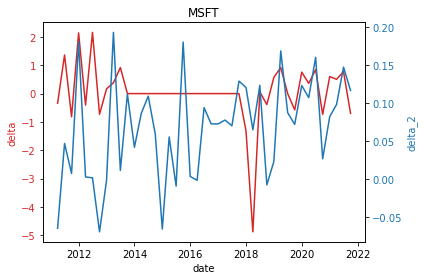

C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2142344797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2142344797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

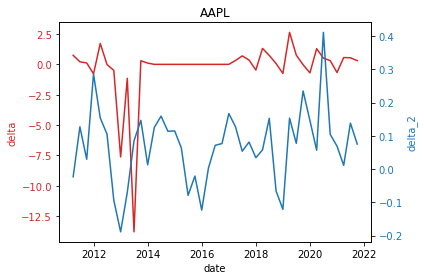

C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2142344797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2142344797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

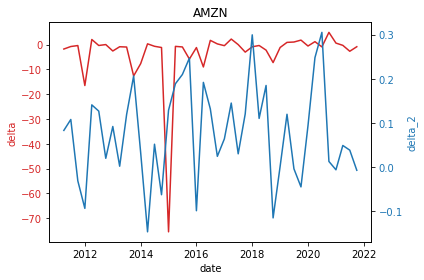

In [62]:
testing_val = "netcashprovidedbyusedinfinancingactivities"
testing_val_2 = "adjclose"
for ticker in ["MSFT","AAPL","AMZN"]:
    ticker_data = final[final["ticker"]==ticker]
    ticker_data.sort_values("date",inplace=True)
    ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
    ticker_data["delta_2"] = ticker_data[testing_val_2].pct_change()
    color = 'tab:red'
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('date')
    ax1.set_ylabel('delta', color=color)
    ax1.plot(ticker_data["date"], ticker_data["delta_1"], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    color = 'tab:blue'
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('delta_2', color=color)  # we already handled the x-label with ax1
    ax2.plot(ticker_data["date"], ticker_data["delta_2"], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(ticker)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2393236951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2393236951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

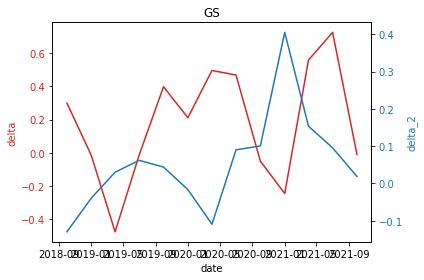

C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2393236951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2393236951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

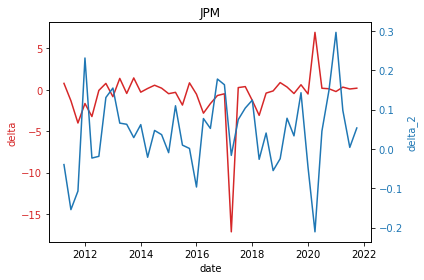

C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2393236951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
C:\Users\eric\AppData\Local\Temp/ipykernel_2392/2393236951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

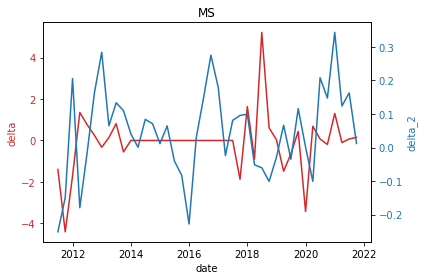

In [61]:
testing_val = "netcashprovidedbyusedinfinancingactivities"
testing_val_2 = "adjclose"
for ticker in ["GS","JPM","MS"]:
    ticker_data = final[final["ticker"]==ticker]
    ticker_data.sort_values("date",inplace=True)
    ticker_data["delta_1"] = ticker_data[testing_val].pct_change()
    ticker_data["delta_2"] = ticker_data[testing_val_2].pct_change()
    ticker_data = ticker_data[ticker_data["delta_1"]>-50]
    color = 'tab:red'
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('date')
    ax1.set_ylabel('delta', color=color)
    ax1.plot(ticker_data["date"], ticker_data["delta_1"], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    color = 'tab:blue'
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('delta_2', color=color)  # we already handled the x-label with ax1
    ax2.plot(ticker_data["date"], ticker_data["delta_2"], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(ticker)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()